<a href="https://colab.research.google.com/github/Roshnasviji/ML_google_colab/blob/main/Animal_detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # for accessing files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 # for image prosessing
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cat_groups = os.listdir('/content/drive/MyDrive/animal detection/cat groups') # to create a list
print(cat_groups[:5]) # first 5 elements
print(cat_groups[-5:]) # last 5 elements

['cats_groups_044.jpg', 'cats_groups_060.jpg', 'cats_groups_056.jpg', 'cats_groups_053.jpg', 'cats_groups_055.jpg']
['images (14).jpg', 'images (15).jpg', 'images (16).jpg', 'images (17).jpg', 'images (18).jpg']


In [ ]:
cats = os.listdir('/content/drive/MyDrive/animal detection/cats')
print(cats[:5])
print(cats[-5:])

['cat.2859.jpg', 'cat.2885.jpg', 'cat.2894.jpg', 'cat.2892.jpg', 'cat.2900.jpg']
['cat.883.jpg', 'cat.889.jpg', 'cat.855.jpg', 'cat.856.jpg', 'cat.901.jpg']


In [ ]:
cats_and_monkeys = os.listdir('/content/drive/MyDrive/animal detection/cats and monkeys')
print(cats_and_monkeys[:5])
print(cats_and_monkeys[-5:])

['cats_and_monkeys_011.jpg', 'cats_and_monkeys_004.jpg', 'cats_and_monkeys_009.jpg', 'cats_and_monkeys_001.jpg', 'cats_and_monkeys_097.jpg']
['images (9).jpg', 'cats_and_monkeys_002.jpg', 'cats_and_monkeys_029.jpg', 'cats_and_monkeys_000.jpg', 'images (10).jpg']


In [ ]:
dogs = os.listdir('/content/drive/MyDrive/animal detection/dogs')
print(dogs[:5])
print(dogs[-5:])

['dog.3001.jpg', 'dog.3046.jpg', 'dog.3033.jpg', 'dog.3025.jpg', 'dog.3034.jpg']
['dog.818.jpg', 'dog.800.jpg', 'dog.820.jpg', 'dog.813.jpg', 'dog.841.jpg']


In [ ]:
dog_and_cat = os.listdir('/content/drive/MyDrive/animal detection/dogs and cat')
print(dog_and_cat[:5])
print(dog_and_cat[-5:])

['dogs_and_cats_002.jpg', 'dogs_and_cats_000.jpg', 'dogs_and_cats_010.jpg', 'dogs_and_cats_005.jpg', 'dogs_and_cats_013.jpg']
['images (17).jpg', 'images (18).jpg', 'images (19).jpg', 'images (20).jpg', 'images (21).jpg']


In [ ]:
dogs_and_monkeys = os.listdir('/content/drive/MyDrive/animal detection/dogs and monkeys')
print(dogs_and_monkeys[:5])
print(dogs_and_monkeys[-5:])

['dog_and_monkey_001.jpg', 'dog_and_monkey_016.jpg', 'dog_and_monkey_000.jpg', 'dog_and_monkey_005.jpg', 'dog_and_monkey_022.jpg']
['images (3).jpg', 'images (4).jpg', 'images (5).jpg', 'images (6).jpg', 'images (7).jpg']


In [ ]:
dog_groups = os.listdir('/content/drive/MyDrive/animal detection/dogs group')
print(dog_groups[:5])
print(dog_groups[-5:])

['dogs_groups_002.jpg', 'dogs_groups_004.jpg', 'dogs_groups_019.jpg', 'dogs_groups_026.jpg', 'dogs_groups_049.jpg']
['images (34).jpg', 'images (35).jpg', 'images (36).jpg', 'images (37).jpg', 'images (38).jpg']


In [ ]:
monkey_groups = os.listdir('/content/drive/MyDrive/animal detection/monkey groups')
print(monkey_groups[:5])
print(monkey_groups[-5:])

['monkey_groups_007.jpg', 'monkey_groups_000.jpg', 'monkey_groups_002.jpg', 'monkey_groups_001.jpg', 'monkey_groups_014.jpg']
['images (11).jpg', 'images (12).jpg', 'images (13).jpg', 'images (14).jpg', 'images (15).jpg']


In [ ]:
monkeys = os.listdir('/content/drive/MyDrive/animal detection/monkeys')
print(monkeys[:5])
print(monkeys[-5:])

['monkeys_002.jpg', 'monkeys_000.jpg', 'monkeys_006.jpg', 'monkeys_003.jpg', 'monkeys_009.jpg']
['n9137.jpg', 'n9162.jpg', 'n9138.jpg', 'n9156.jpg', 'n9161.jpg']


In [ ]:
print('Number of cat group images:',len(cat_groups))
print('Number of cat images:',len(cats))
print('Number of cat and monkey images:',len(cats_and_monkeys))
print('Number of dog images:',len(dogs))
print('Number of dog and cat images:',len(dog_and_cat))
print('Number of dog and monkey images:',len(dogs_and_monkeys))
print('Number of dog group images:',len(dog_groups))
print('Number of monkey group images:',len(monkey_groups))
print('Number of monkey images:',len(monkeys))


Number of cat group images: 72
Number of cat images: 3980
Number of cat and monkey images: 51
Number of dog images: 3878
Number of dog and cat images: 81
Number of dog and monkey images: 43
Number of dog group images: 61
Number of monkey group images: 62
Number of monkey images: 619


Creating labels

In [ ]:
cat_groups_labels = [0]*72
cats_labels = [1]*3980
cats_and_monkeys_labels = [2]*51
dogs_labels = [3]*3878
dog_and_cat_labels = [4]*81
dogs_and_monkeys_labels = [5]*43
dog_groups_labels = [6]*61
monkey_groups_labels = [7]*62
monkeys_labels = [8]*619

In [ ]:
print(cat_groups_labels[:5])
print(cats_labels[:5])
print(cats_and_monkeys_labels[:5])
print(dogs_labels[:5])
print(dog_and_cat_labels[:5])
print(dogs_and_monkeys_labels[:5])
print(dog_groups_labels[:5])
print(monkey_groups_labels[:5])
print(monkeys_labels[:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[4, 4, 4, 4, 4]
[5, 5, 5, 5, 5]
[6, 6, 6, 6, 6]
[7, 7, 7, 7, 7]
[8, 8, 8, 8, 8]


In [ ]:
print(len(cat_groups_labels))
print(len(cats_labels))
print(len(cats_and_monkeys_labels))
print(len(dogs_labels))
print(len(dog_and_cat_labels))
print(len(dogs_and_monkeys_labels))
print(len(dog_groups_labels))
print(len(monkey_groups_labels))
print(len(monkeys_labels))

72
3980
51
3878
81
43
61
62
619


In [ ]:
labels = cat_groups_labels + cats_labels + cats_and_monkeys_labels + dogs_labels + dog_and_cat_labels + dogs_and_monkeys_labels + dog_groups_labels + monkey_groups_labels + monkeys_labels
print(labels)
print(len(labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

displaying the image

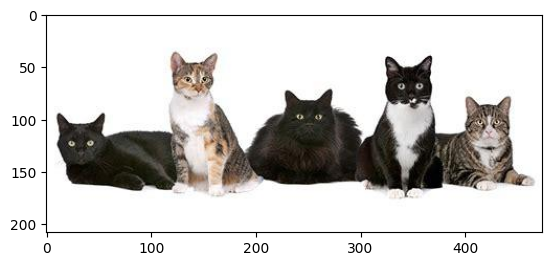

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/animal detection/cat groups/cats_groups_007.jpg')
imgplot = plt.imshow(img)
plt.show()

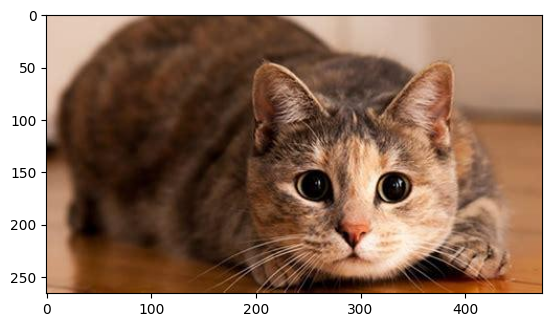

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/animal detection/cats/cats_011.jpg')
imgplot = plt.imshow(img)
plt.show()

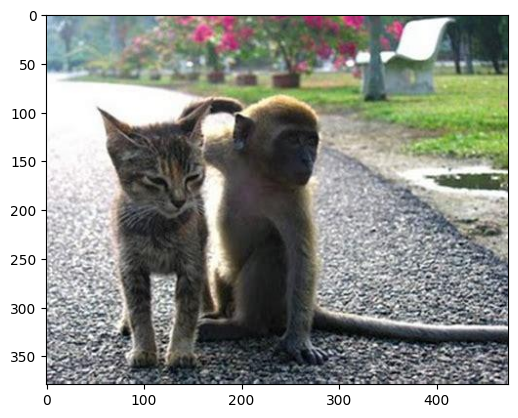

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/animal detection/cats and monkeys/cats_and_monkeys_015.jpg')
imgplot = plt.imshow(img)
plt.show()

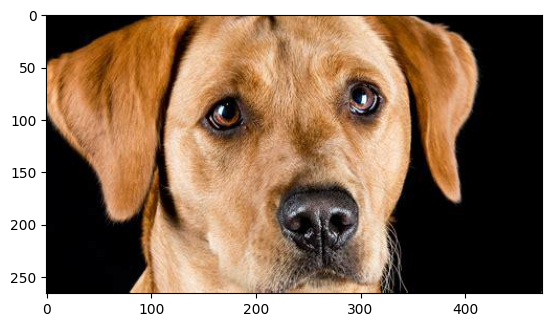

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/animal detection/dogs/dogs_005.jpg')
imgplot = plt.imshow(img)
plt.show()

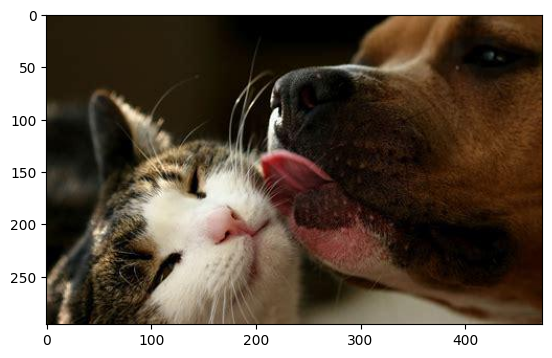

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/animal detection/dogs and cat/dogs_and_cats_012.jpg')
imgplot = plt.imshow(img)
plt.show()

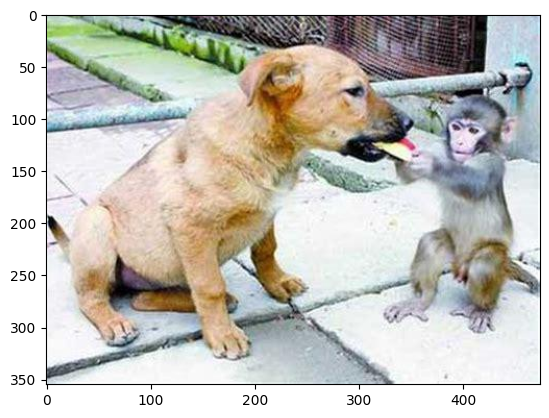

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/animal detection/dogs and monkeys/dog_and_monkey_012.jpg')
imgplot = plt.imshow(img)
plt.show()

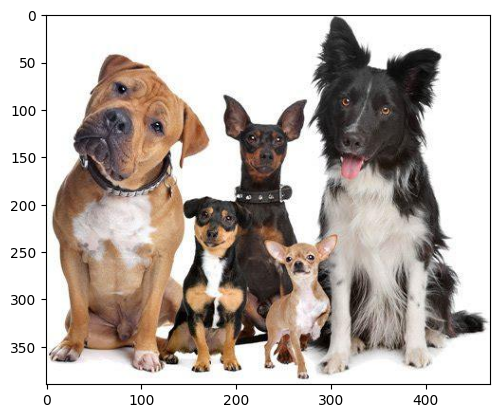

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/animal detection/dogs group/dogs_groups_005.jpg')
imgplot = plt.imshow(img)
plt.show()

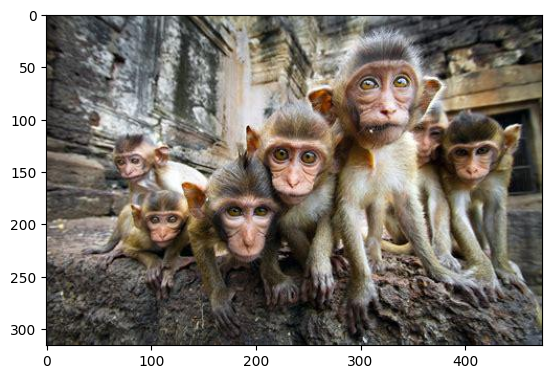

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/animal detection/monkey groups/monkey_groups_004.jpg')
imgplot = plt.imshow(img)
plt.show()

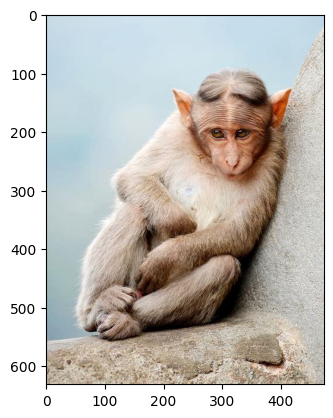

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/animal detection/monkeys/monkeys_007.jpg')
imgplot = plt.imshow(img)
plt.show()

# image processing

Resize the images

image processing

1.Resize the images

2.Convert the images to numpy arrays

In [ ]:
cat_groups_path = '/content/drive/MyDrive/animal detection/cat groups/'
data = []  # creating a numpy list

for img_file in os.listdir(cat_groups_path):
  img_path = os.path.join(cat_groups_path, img_file)
  if os.path.isfile(img_path):
    image = Image.open(cat_groups_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [ ]:
cats_path = '/content/drive/MyDrive/animal detection/cats/'
for img_file in os.listdir(cats_path):
  img_path = os.path.join(cats_path, img_file)
  if os.path.isfile(img_path):
    image = Image.open(cats_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [ ]:
cats_and_monkeys_path = '/content/drive/MyDrive/animal detection/cats and monkeys/'
for img_file in os.listdir(cats_and_monkeys_path):
  img_path = os.path.join(cats_and_monkeys_path, img_file)
  if os.path.isfile(img_path):
    image = Image.open(cats_and_monkeys_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [ ]:
dogs_path = '/content/drive/MyDrive/animal detection/dogs/'
for img_file in os.listdir(dogs_path):
  img_path = os.path.join(dogs_path, img_file)
  if os.path.isfile(img_path):
    image = Image.open(dogs_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [ ]:
dogs_and_cat_path = '/content/drive/MyDrive/animal detection/dogs and cat/'
for img_file in os.listdir(dogs_and_cat_path):
  img_path = os.path.join(dogs_and_cat_path, img_file)
  if os.path.isfile(img_path):
    image = Image.open(dogs_and_cat_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [ ]:
dogs_and_monkeys_path = '/content/drive/MyDrive/animal detection/dogs and monkeys/'
for img_file in os.listdir(dogs_and_monkeys_path):
  img_path = os.path.join(dogs_and_monkeys_path, img_file)
  if os.path.isfile(img_path):
    image = Image.open(dogs_and_monkeys_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [ ]:
dogs_group_path = '/content/drive/MyDrive/animal detection/dogs group/'
for img_file in os.listdir(dogs_group_path):
  img_path = os.path.join(dogs_group_path, img_file)
  if os.path.isfile(img_path):
    image = Image.open(dogs_group_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [ ]:
monkey_groups_path = '/content/drive/MyDrive/animal detection/monkey groups/'
for img_file in os.listdir(monkey_groups_path):
  img_path = os.path.join(monkey_groups_path, img_file)
  if os.path.isfile(img_path):
    image = Image.open(monkey_groups_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [ ]:
monkeys_path = '/content/drive/MyDrive/animal detection/monkeys/'
for img_file in os.listdir(monkeys_path):
  img_path = os.path.join(monkeys_path, img_file)
  if os.path.isfile(img_path):
    image = Image.open(monkeys_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

array([[[ 22,  23,  17],
        [ 22,  23,  17],
        [ 21,  22,  16],
        ...,
        [  9,  12,   9],
        [  9,  13,   9],
        [  9,  13,   9]],

       [[ 22,  23,  17],
        [ 22,  23,  17],
        [ 21,  22,  16],
        ...,
        [ 10,  12,   9],
        [ 10,  12,   9],
        [ 10,  12,   9]],

       [[ 22,  23,  17],
        [ 22,  23,  17],
        [ 21,  22,  16],
        ...,
        [ 11,  11,   9],
        [ 11,  11,   9],
        [ 11,  11,   9]],

       ...,

       [[165,  93,  40],
        [169,  96,  41],
        [168,  96,  39],
        ...,
        [173, 114,  48],
        [172, 113,  46],
        [177, 117,  51]],

       [[174, 100,  47],
        [176, 102,  48],
        [175, 102,  45],
        ...,
        [170, 111,  40],
        [167, 108,  37],
        [171, 112,  42]],

       [[175,  98,  46],
        [173,  97,  42],
        [173,  98,  42],
        ...,
        [168, 109,  36],
        [165, 106,  34],
        [170, 111,  42]]], dtype=uint8)
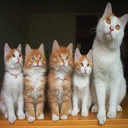

In [ ]:
data[0]

In [ ]:
print(len(data))

8847


In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(len(X))
print(len(Y))

8847
8847


In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
Y

array([0, 0, 0, ..., 8, 8, 8])

train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
print(X.shape, x_train.shape, x_test.shape)

(8847, 128, 128, 3) (7077, 128, 128, 3) (1770, 128, 128, 3)


In [ ]:
#scaling the data

x_train_scaled =  x_train/255   #to change the value from 0 to 1


x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.16470588, 0.16078431, 0.15686275],
        [0.18431373, 0.18039216, 0.16470588],
        [0.18823529, 0.18431373, 0.16078431],
        ...,
        [0.14509804, 0.1372549 , 0.14509804],
        [0.14901961, 0.1372549 , 0.14901961],
        [0.14117647, 0.12941176, 0.14117647]],

       [[0.16470588, 0.16078431, 0.15686275],
        [0.14509804, 0.14117647, 0.12941176],
        [0.16470588, 0.16078431, 0.1372549 ],
        ...,
        [0.13333333, 0.1254902 , 0.1254902 ],
        [0.15294118, 0.13333333, 0.14117647],
        [0.15686275, 0.1254902 , 0.14509804]],

       [[0.20392157, 0.19215686, 0.19215686],
        [0.20392157, 0.18823529, 0.18039216],
        [0.16470588, 0.15294118, 0.12941176],
        ...,
        [0.16470588, 0.14901961, 0.14509804],
        [0.19607843, 0.16470588, 0.17647059],
        [0.20784314, 0.15686275, 0.18431373]],

       ...,

       [[0.29803922, 0.29411765, 0.28627451],
        [0.29803922, 0.29411765, 0.28627451],
        [0.29803922, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 9
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
#compile the nerual network
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc'])

In [ ]:
#training the neural network
history = model.fit(x_train_scaled,y_train, validation_split=0.1, epochs=5)

Epoch 1/5
200/200 [==============================] - 193s 958ms/step - loss: 1.1940 - acc: 0.4858 - val_loss: 1.0286 - val_acc: 0.5367
Epoch 2/5
200/200 [==============================] - 189s 945ms/step - loss: 0.9855 - acc: 0.5858 - val_loss: 0.9526 - val_acc: 0.5989
Epoch 3/5
200/200 [==============================] - 177s 880ms/step - loss: 0.8890 - acc: 0.6302 - val_loss: 0.9421 - val_acc: 0.5890
Epoch 4/5
200/200 [==============================] - 179s 896ms/step - loss: 0.7922 - acc: 0.6704 - val_loss: 0.9263 - val_acc: 0.6511
Epoch 5/5
200/200 [==============================] - 181s 908ms/step - loss: 0.7260 - acc: 0.7039 - val_loss: 0.9254 - val_acc: 0.6314


model evaluation

In [ ]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy= ', accuracy)

56/56 [==============================] - 11s 198ms/step - loss: 0.8609 - acc: 0.6616
Test Accuracy=  0.6615819334983826


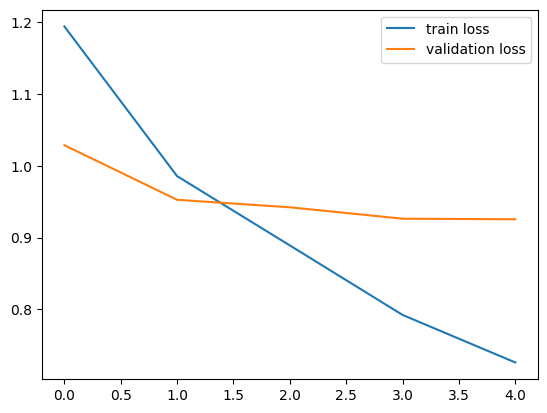

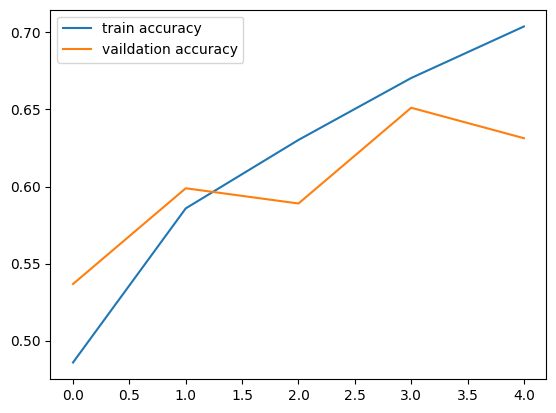

In [ ]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='vaildation accuracy')
plt.legend()
plt.show()

predictive system

path of the image to be pedicted: /content/drive/MyDrive/animal detection/cats and monkeys/cats_and_monkeys_093.jpg


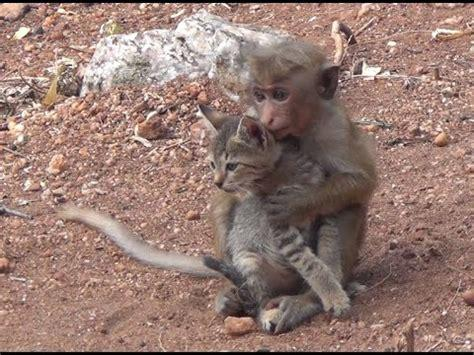

1/1 [==============================] - 0s 46ms/step
[[0.00736292 0.32294965 0.01237781 0.5838948  0.00815943 0.00469351
  0.00877137 0.00978668 0.04200384]]
3
dogs


In [ ]:
input_image_path = input('path of the image to be pedicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('cat groups')
elif input_pred_label == 1:
  print('cats')
elif input_pred_label == 2:
  print('cats and monkeys')
elif input_pred_label == 3:
  print('dogs')
elif input_pred_label == 4:
  print('dogs and cat')
elif input_pred_label == 5:
  print('dogs and monkeys')
elif input_pred_label == 6:
  print('dogs group')
elif input_pred_label == 7:
  print('monkey group')
else:
  print('monkeys')
